# Einsendeaufgabe 3

## Aufgabe 1.1

In [126]:
import time

# Linearer Kongruenzgenerator.
# Der seed hat den Default-Wert der Systemzeit in Millisekunden.
def my_random_numbers(a, b, m, seed=round(time.time())):
    seed = seed % m
    
    #Liste von Pseudozufallszahlen
    rand_list = [seed]
    for i in range(99):
        rand_list.append((a * rand_list[i] + b) % m)
    return rand_list

numbers = my_random_numbers(a=4, b=1, m=9)
print(numbers)

[2, 0, 1, 5, 3, 4, 8, 6, 7, 2, 0, 1, 5, 3, 4, 8, 6, 7, 2, 0, 1, 5, 3, 4, 8, 6, 7, 2, 0, 1, 5, 3, 4, 8, 6, 7, 2, 0, 1, 5, 3, 4, 8, 6, 7, 2, 0, 1, 5, 3, 4, 8, 6, 7, 2, 0, 1, 5, 3, 4, 8, 6, 7, 2, 0, 1, 5, 3, 4, 8, 6, 7, 2, 0, 1, 5, 3, 4, 8, 6, 7, 2, 0, 1, 5, 3, 4, 8, 6, 7, 2, 0, 1, 5, 3, 4, 8, 6, 7, 2]


* Die Zahlenkette wiederholt spätestens nach m Pseudozufallszahlen.
* Beim Versuch die Unregelmäßigkeit zu verbessern, fällt auf, dass es nicht möglich ist, dass zwei identische Zahlen aufeinander folgen.

## Aufgabe 1.2

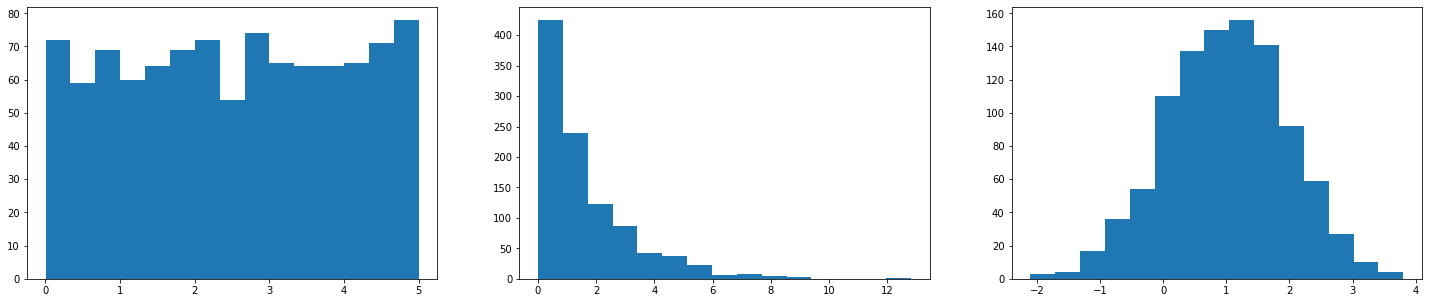

In [128]:
import numpy as np
import matplotlib.pyplot as plt


#Gleichverteilte Zufallsvariable
def equal_distribution(a, b, n=1000):
    set = np.empty(n)
    for i in range(n):
        set[i] = np.random.rand() * (b -a)
    
    return set


#Exponentialverteilte Zufallsvariable
def exponential_distribution(lamb, n=1000):
    set = np.empty(n)
    for i in range(n):
        set[i] = -1/lamb * np.log(np.random.rand())
        
    return set


#Gaußverteilte Zufallsvariable
#mit Hilfe der Zwölferregel
def gauss_distribution(mu, sigma, n=1000):
    set = np.empty(n)
    
    #in jedem Schleifendurchgang werden 12 gleichverteilte Zufallsvariablen
    #im Intervall [0,1] addiert.
    for i in range(n):
        rand_samples = np.random.sample(12)
        set[i] = sigma * (np.sum(rand_samples) -6) + mu
    
    return set


plt.figure(figsize=(25, 5))

equal = (equal_distribution(a=0, b=5))
plt.subplot(1, 3, 1)
plt.hist(equal, 15)

exponential = (exponential_distribution(lamb=0.6))
plt.subplot(1, 3, 2)
plt.hist(exponential, 15)

gauss = (gauss_distribution(mu=0.9, sigma=1))
plt.subplot(1, 3, 3)
plt.hist(gauss, 15)

plt.show()

## Aufgabe 2.1

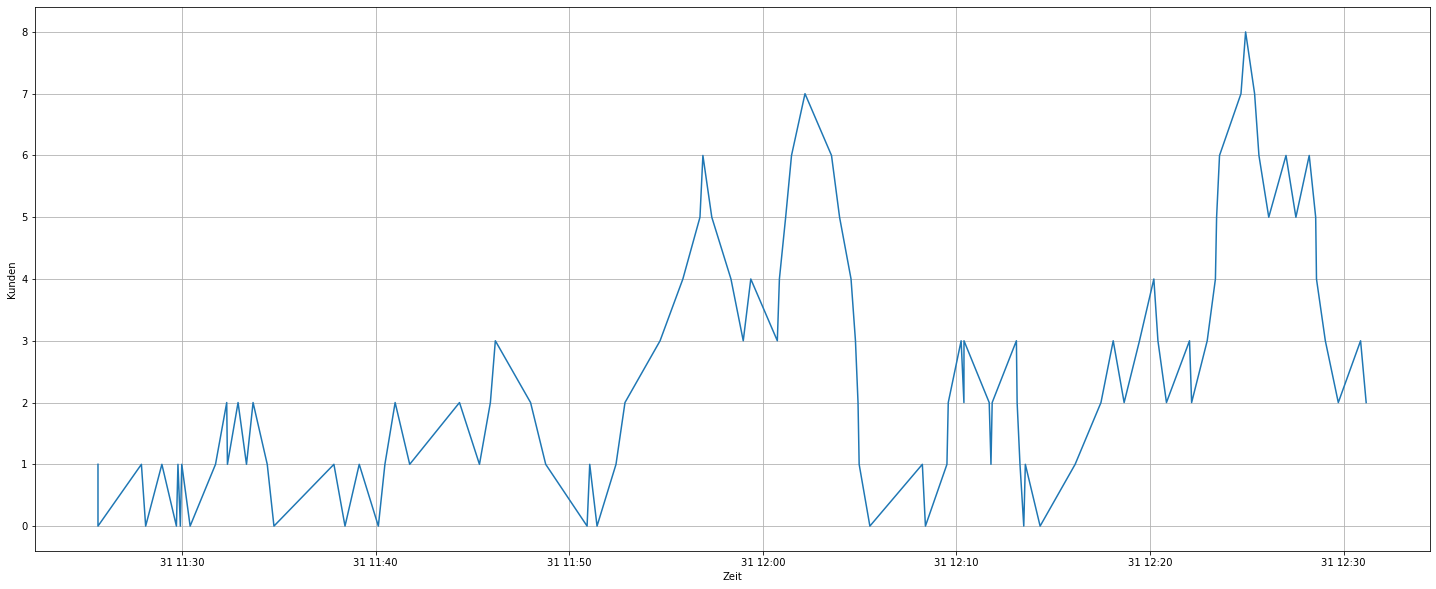

In [117]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta


#Die Klasse Model simuliert eine M/M/1 Warteschlange
#mit lamb der Ankunftsrate, mu der Bearbeitungsrate
class Model:
    
    def __init__(self, lamb, mu):
        self.lamb = lamb
        self.mu = mu
        
        self.time = datetime.now()
        self.filling = 0
        self.next_task = 0
        self.next_departure = 0
    
    
    #in jedem Zeitschritt wird geprüft, ob als nächstes ein Kunde ankommt oder abreist
    #, oder ob die Warteschlange leer ist.
    def __timestep(self):
        if self.filling == 0:
            self.time += timedelta(minutes=self.next_task)
            self.__new_task()
        elif self.next_task <= self.next_departure:
            self.time += timedelta(minutes=self.next_task)
            self.next_departure -= self.next_task
            self.__new_task()
        else:
            self.time += timedelta(minutes=self.next_departure)
            self.next_task -= self.next_departure
            self.__finished()
            
    
    #Kunde kommt an
    #Zähler für die Füllung wird inkrementiert
    #Zeitintervall bis zum nächsten Kunden wird gesetzt
    def __new_task(self):
        self.filling += 1
        self.next_task = np.random.exponential(1/self.lamb)
        
    #Kunde reist ab
    #Zähler für die Füllung wird dekrementiert
    #Zeitintervall bis zur nächsten Abreise wird gesetzt
    def __finished(self):
        self.filling -= 1
        self.next_departure = np.random.exponential(1/self.mu)

        
    #Siemulation für n-Zeitschritte
    #Einzelergebnisse werden in der Liste data gespeichert
    def simulate(self, n):
        data = np.empty(shape=(n,1))
        timesteps = np.empty(shape=(n,1), dtype=datetime)
        for i in range(n):
            self.__timestep()
            data[i] = self.filling
            timesteps[i] = self.time
            #print('Füllung: ', self.filling, ' Time: ', self.time.time(), ' nächster Kunde: ', round(self.next_task, 2), ' nächste Abreise: ', round(self.next_departure, 2))

            
        return data, timesteps
        
#Initialisierung und Simulation über 100 Zeitschritte        
flughafen = Model(lamb=0.6, mu=0.9)
data = flughafen.simulate(100)

plt.figure(figsize=(25, 10))
plt.grid()
plt.plot_date(data[1], data[0], '-')
plt.ylabel('Kunden')
plt.xlabel('Zeit')
plt.show()

## Aufgabe 3.1.1

Die mittlere Bedienzeit ergibt sich direkt aus $\mu$ mit
\begin{align*}
E_B = \frac{1}{\mu} = \frac{10}{9}
,\end{align*}

die mittlere Verweilzeit
\begin{align*}
E_Y = \frac{1}{\mu - \lambda} = \frac{10}{3}
,\end{align*}

die mittlere Wartezeit
\begin{align*}
E_W = E_Y - E_B = \frac{20}{9}
\end{align*}

und die mittlere Füllung der Warteschlange
\begin{align*}
E_{F_{WS}} = \lambda E_W = \frac{4}{3}
.\end{align*}


## Aufgabe 3.1.2

Damit das System stabil ist, muss $\lambda < \mu$ gelten.

## Aufgabe 4

1. $c_1 = \frac{1}{10}$ <br>
$c_2 = \frac{1}{5}$ <br>
$c_3 = \frac{1}{1}$ <br>
$c_4 = \frac{1}{5}$ <br>
$c_5 = \frac{1}{1}$ <br>

2. $E(B_S) = \sum_iv_iE(B_i) = 100h + 5h + 3h + 25h + 1h = 134h$

3. Bin mir nicht sicher, ob ich die Frage richtig verstanden habe. Ich gege davon aus, dass der Gesamtdurchsatz bei $f_S = 1$ gemeint ist und somit $E(D_S) = \frac{1}{E(B_S)}$ gilt. <br>
Dann ist $\rho_i = \frac{v_i}{c_i}E(D_S) = \frac{E(B_i)}{E(B_S)}v_i$ <br>
$\rho_1 \approx 0.746$ <br>
$\rho_2 \approx 0.037$ <br>
$\rho_3 \approx 0.022$ <br>
$\rho_4 \approx 0.186$ <br>
$\rho_5 \approx 0.007$ <br>

4. Für den Verkehrsengpass gilt $\rho_{VE} = max(\rho_i)$, damit ist der Brennofen der Verkehrsengpass. <br>

5. Wenn der Verkehrsengpass voll ausgelastet ist, stauen sich immer mehr Aufträge in der Warteschlange und es gilt für den Systemdurchsatz $\hat{E}(D_S) \approx c_S = \frac{c_{1}}{v_{1}} = \frac{1}{100}$

6. Die Sättigungsfüllung ist $\hat{f}_S = c_SE(B_S) = 1.34$